# <u> Linear Regression </u>

###  <u> Question to be answered </u> : What will the predicted score be if a student studies for 9.25 hrs in a day? 

#### 1. Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

G:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
G:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### 2. Import the dataset from the url

In [2]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### 3. Plot the data to find the relationships 

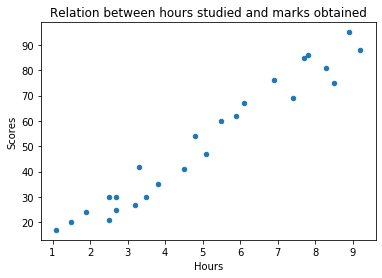

In [19]:
data.plot(x="Hours", y= "Scores", xlabel = 'Hours of Studying', ylabel = 'Scores obtained',
          title = 'Relation between hours studied and marks obtained', kind = 'scatter')

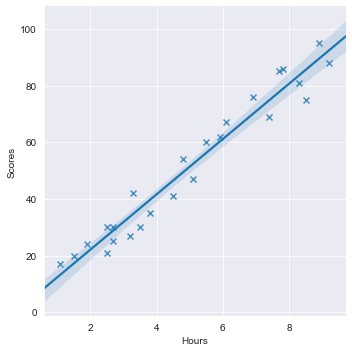

In [225]:
# using seaborn library to plot the regression line
sns.set_style("darkgrid")
sns.lmplot(x="Hours", y= "Scores", markers ='x', data = data)

From the plot we can see that there is a linear relationship between the two parameters

#### 4. Indicate labels for the data. Let marks obtained be the label.

In [32]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [34]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### 5. Split the data into training and testing sets using sklearn

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 60)

In [129]:
type(X_train)

numpy.ndarray

Text(0, 0.5, 'Scores(y+train + y_test)')

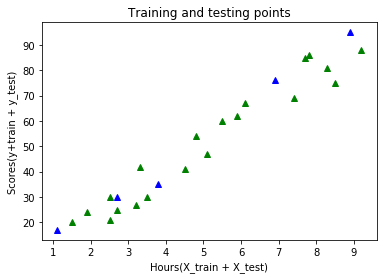

In [139]:
plt.plot(X_train, y_train, 'g^')
plt.plot(X_test, y_test, 'b^')
plt.title('Training and testing points')
plt.xlabel('Hours(X_train + X_test)')
plt.ylabel('Scores(y+train + y_test)')

#### 6. Train the model using Linear Regression

In [205]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To plot the linear regression line, we can use the formula for Linear Regression. <br>
The formula is: <b> y = mX+c </b> <br>
The values of 'm' and 'b' are obtained from the attributes of the model. 

In [141]:
print("Value of m is", lr.coef_)

Value of m is [9.59563563]


In [142]:
print("Value of c is", lr.intercept_)

Value of c is 2.810236462826552


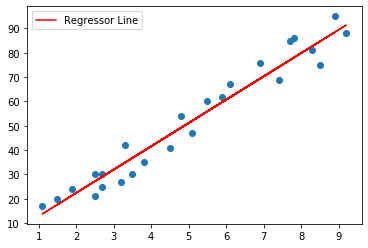

In [85]:
# plot the regression line in the graph
line = lr.coef_ * X + lr.intercept_
plt.scatter(X,y)
plt.plot(X, line, 'r')
plt.legend(['Regressor Line'])

#### 7. Predict the test values

In [206]:
y_pred = lr.predict(X_test)

In [134]:
print(y_pred)

[74.90959672 70.0740592  46.86347911 37.19240407 62.33719917]


In [144]:
#Compare the actual and predicted values
comparison = pd.DataFrame({'Actual_val': y_test, 'Predicted': y_pred})
comparison

,Actual_val,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


#### 8. Check the performance of the model using scikitlearn's metrics library

In [207]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [208]:
print("Mean Absolute Error is", mae)
print("Mean Squared Error is", mse)
print("Root Mean Squared Error is", rmse)

Mean Absolute Error is 3.256972083783501
Mean Squared Error is 14.458645457297166
Root Mean Squared Error is 3.802452558191511


#### 9. Predict the value for the question given

In [226]:
# score if the student studies for 9.25 hours a day
hours = 9.2

In [227]:
type(hours)

float

In [228]:
nerd = lr.predict([[hours]])
#the double square brackets is done because the model expects a 2D array and the input we are giving is a 1D array.

In [229]:
nerd

array([92.26302583])

### To answer the question that was asked in the beginning, the student who studies for 9.2 hours a day will get approximately 92.26 percent according to this model